In [1]:
import torch
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy as np
from itertools import product

plt.style.use("cyberpunk")

# Problem 1

In [2]:
def gradients(f):
    def wrapper(x):
        (x := torch.tensor([x], dtype=float).flatten()).requires_grad_(True)
        (y := f(x)).backward()
        return y.item(), x.grad.numpy()

    return wrapper


@gradients
def rational(x):
    numerator = x**5 - 2 * x**3 + x
    denominator = x**4 + 3 * x**2 + 1
    return torch.sum(numerator / denominator)


@gradients
def schwefel(x):
    return torch.sum(x * torch.sin(torch.sqrt(torch.abs(x))))


@gradients
def rastrigin(x):
    return 10 * len(x) + torch.sum(x**2 - 10 * torch.cos(2 * torch.pi * x))


@gradients
def griewank(x):
    indices = torch.arange(len(x)) + 1
    return torch.sum(x**2) / 4000 - torch.prod(torch.cos(x) / torch.sqrt(indices)) + 1


@gradients
def rosenbrock(x):
    y = 100 * (x**2 - torch.roll(x, -1)) ** 2 + (x - 1) ** 2
    return torch.sum(y[:-1])

In [206]:
def gradient_descent(function, start, learning_rate=1e-2, steps=10, acc=1.1, µ=0.9):
    trajectory = [start]
    step = 0

    for _ in range(steps):
        x = trajectory[-1].copy()
        grad = function(x)[1]
        step = acc * µ * step + (1 - µ) * grad
        x -= learning_rate * step
        trajectory.append(x)
    return np.array(trajectory)

In [207]:
def apply(function, interval, n=100):
    lin = np.linspace(*interval, n)
    X, Y = np.meshgrid(lin, lin)
    XY = np.dstack((X, Y))
    Z = np.zeros((n, n))
    for i, j in product(range(n), range(n)):
        Z[i, j] = function(XY[i, j])[0]
    return X, Y, Z

#### Gradient decent trajectories

In [238]:
def plot_decent_steps(function, space=500, learning_rate=1e-2, n=10, levels=None):
    X, Y, Z = apply(function, (-space, space))
    plt.contour(X, Y, Z, cmap="viridis", levels=levels)
    for _ in range(n):
        x0 = np.random.uniform(-space * 0.8, space * 0.8, 2)
        trajectory = gradient_descent(
            function,
            x0,
            learning_rate=learning_rate,
        )
        # plt.scatter(*x0.T, marker="^")
        plt.plot(*trajectory.T, "o-", markersize=1, linewidth=0.1)
    plt.title("Gradient Descent Trajectories")
    plt.colorbar(label="Function Value")
    plt.xlim(-space, space)
    plt.ylim(-space, space)
    plt.grid(True)
    plt.show()

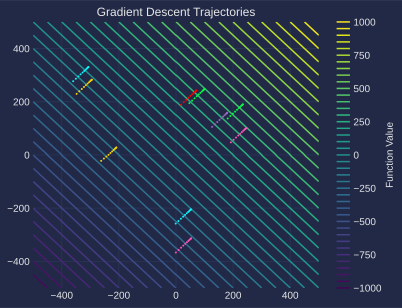

In [239]:
plot_decent_steps(rational, learning_rate=10, levels=40)

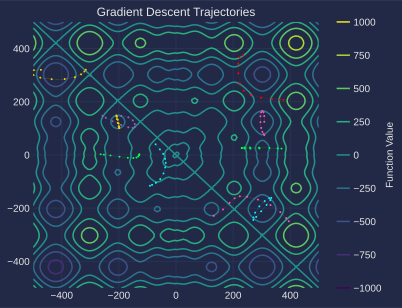

In [240]:
plot_decent_steps(schwefel, learning_rate=15)

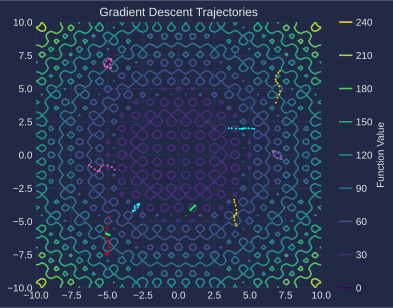

In [241]:
plot_decent_steps(rastrigin, space=10, learning_rate=2e-2)

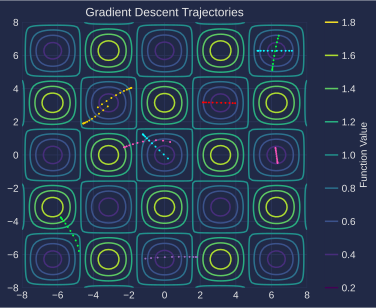

In [242]:
plot_decent_steps(griewank, space=8, learning_rate=1)

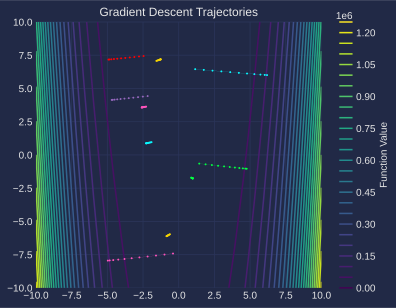

In [244]:
plot_decent_steps(rosenbrock, space=10, learning_rate=2e-5, levels=25)

### Gradient descent regions

In [264]:
def plot_convergence_regions(function, space=500, learning_rate=1e-3):
    X, Y, Z = apply(
        lambda x: function(
            gradient_descent(function, x, steps=1000, learning_rate=learning_rate)[-1]
        ),
        [-space, space],
        n=10,
    )
    plt.figure(figsize=(8, 6))
    plt.imshow(Z, origin="lower", cmap="viridis")
    plt.colorbar(label="Function value")
    plt.title("Convergence regions")
    plt.show()

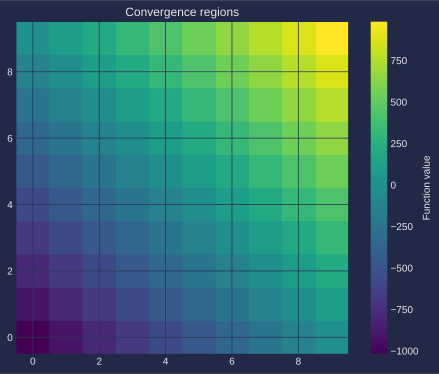

In [270]:
plot_convergence_regions(rational)

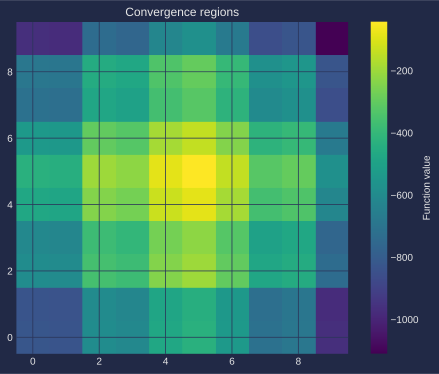

In [271]:
plot_convergence_regions(schwefel, space=500)

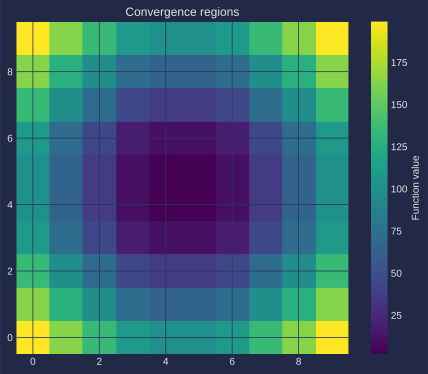

In [272]:
plot_convergence_regions(rastrigin, space=10)

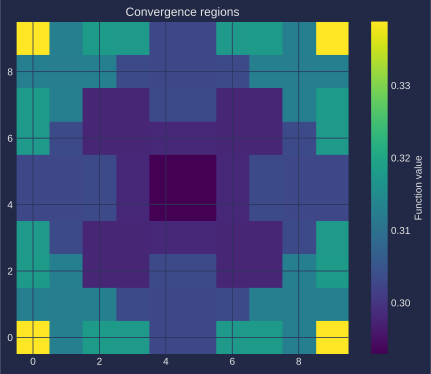

In [273]:
plot_convergence_regions(griewank, space=8)

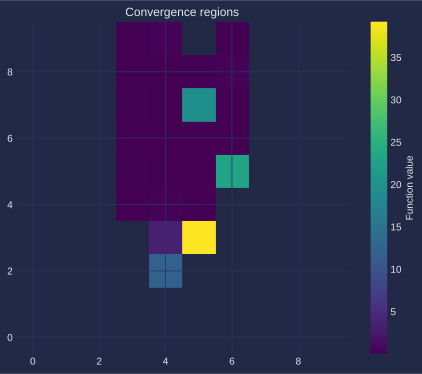

In [274]:
plot_convergence_regions(rosenbrock, space=10)

# Problem 2

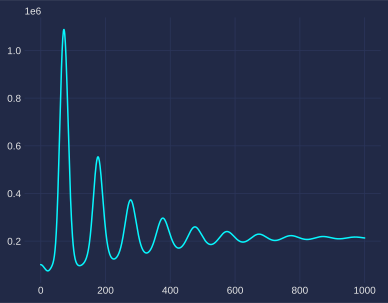

In [294]:
x0 = np.random.normal(0, 10, 3)
plt.plot(
    [
        rosenbrock(x)[0]
        for x in gradient_descent(schwefel, x0, steps=1000, learning_rate=0.1)
    ]
)

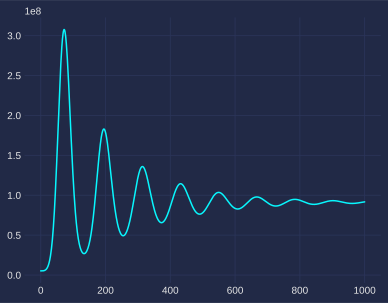

In [295]:
x0 = np.random.normal(0, 10, 5)
plt.plot(
    [
        rosenbrock(x)[0]
        for x in gradient_descent(schwefel, x0, steps=1000, learning_rate=0.1)
    ]
)

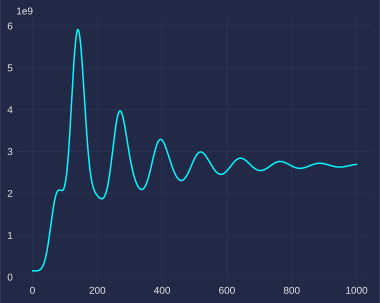

In [300]:
x0 = np.random.normal(0, 10, 50)
plt.plot(
    [
        rosenbrock(x)[0]
        for x in gradient_descent(schwefel, x0, steps=1000, learning_rate=0.1)
    ]
)